In [23]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
#loading the traning dataset and using head function to see the first five values of the data 
Apple_train=pd.read_csv("Apple_training_dataset.csv")
Apple_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,14.621429,14.732143,14.607143,14.686786,12.519279,302220800
1,2012-01-04,14.642857,14.810000,14.617143,14.765714,12.586558,260022000
2,2012-01-05,14.819643,14.948214,14.738214,14.929643,12.726295,271269600
3,2012-01-06,14.991786,15.098214,14.972143,15.085714,12.859333,318292800
4,2012-01-09,15.196429,15.276786,15.048214,15.061786,12.838934,394024400


In [25]:
#getting info on the Columns
Apple_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2264 non-null   object 
 1   Open       2264 non-null   float64
 2   High       2264 non-null   float64
 3   Low        2264 non-null   float64
 4   Close      2264 non-null   float64
 5   Adj Close  2264 non-null   float64
 6   Volume     2264 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 123.9+ KB


In [26]:
#using the closing price to train the model 

Apple_training_set=Apple_train.iloc[:,4:5].values
print(Apple_training_set)
print(Apple_training_set.shape)

[[ 14.686786]
 [ 14.765714]
 [ 14.929643]
 ...
 [136.690002]
 [134.869995]
 [133.720001]]
(2264, 1)


In [27]:
#Normalizinfg the data      


from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))
scaled_training_set=scaler.fit_transform(Apple_training_set)
scaled_training_set

array([[0.00602306],
       [0.0066661 ],
       [0.00800165],
       ...,
       [1.        ],
       [0.98517215],
       [0.97580299]])

In [28]:
#Creating the training dataset
X_train=[]
Y_train=[]
for i in range(60,2264):
    X_train.append(scaled_training_set[i-60:i,0])
    Y_train.append(scaled_training_set[i,0])

X_train=np.array(X_train)

Y_train=np.array(Y_train)

In [29]:
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(2204, 60, 1)

In [30]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense 
from keras.layers import Dropout


In [31]:
reg= Sequential()

reg.add(LSTM(units= 50,return_sequences= True, input_shape=(X_train.shape[1],1)))
reg.add(Dropout(0.2))

reg.add(LSTM(units= 50,return_sequences=True))
reg.add(Dropout(0.2))


reg.add(LSTM(units= 50,return_sequences=True))
reg.add(Dropout(0.2))


reg.add(LSTM(units= 50))
reg.add(Dropout(0.2))

reg.add(Dense(units=1))


In [32]:
reg.compile(optimizer='adam', loss= 'mean_squared_error')
reg.fit(X_train,Y_train, epochs= 100, batch_size=35)

Epoch 1/100
63/63 [==============================] - 18s 137ms/step - loss: 0.0068
Epoch 2/100
63/63 [==============================] - 8s 123ms/step - loss: 0.0021
Epoch 3/100
63/63 [==============================] - 8s 122ms/step - loss: 0.0019
Epoch 4/100
63/63 [==============================] - 8s 125ms/step - loss: 0.0014
Epoch 5/100
63/63 [==============================] - 9s 137ms/step - loss: 0.0013
Epoch 6/100
63/63 [==============================] - 8s 130ms/step - loss: 0.0016
Epoch 7/100
63/63 [==============================] - 8s 132ms/step - loss: 0.0012
Epoch 8/100
63/63 [==============================] - 9s 135ms/step - loss: 0.0012
Epoch 9/100
63/63 [==============================] - 10s 162ms/step - loss: 0.0013
Epoch 10/100
63/63 [==============================] - 10s 158ms/step - loss: 0.0014
Epoch 11/100
63/63 [==============================] - 9s 136ms/step - loss: 0.0010
Epoch 12/100
63/63 [==============================] - 8s 125ms/step - loss: 8.7897e-04
Epoch 

In [35]:
#Actual stock prices



Apple_test=pd.read_csv("Apple_test_dataset.csv")
Apple_test.head()



,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-04,133.520004,133.610001,126.760002,129.410004,127.874954,143301900
1,2021-01-05,128.889999,131.740005,128.429993,131.009995,129.455963,97664900
2,2021-01-06,127.720001,131.050003,126.379997,126.599998,125.098267,155088000
3,2021-01-07,128.360001,131.630005,127.860001,130.919998,129.367035,109578200
4,2021-01-08,132.429993,132.630005,130.229996,132.050003,130.483627,105158200


In [36]:
Apple_test.info()
actual_price=Apple_test.iloc[:,4:5].values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       488 non-null    object 
 1   Open       488 non-null    float64
 2   High       488 non-null    float64
 3   Low        488 non-null    float64
 4   Close      488 non-null    float64
 5   Adj Close  488 non-null    float64
 6   Volume     488 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 26.8+ KB


In [37]:
total_dataset=pd.concat((Apple_train['Close'],Apple_test['Close']),axis= 0)
inp=total_dataset[len(total_dataset)-len(Apple_test)-60:].values

inp=inp.reshape(-1,1)
inp=scaler.transform(inp)

X_test=[]
for i in range(60,548):
  X_test.append(inp[i-60:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))




In [38]:
pred_stock_price=reg.predict(X_test)
pred_stock_price=scaler.inverse_transform(pred_stock_price)

16/16 [==============================] - 2s 31ms/step


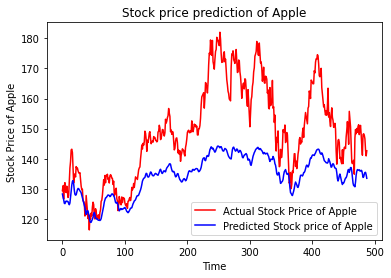

In [43]:
plt.plot(actual_price,color='red',label= 'Actual Stock Price of Apple')
plt.plot(pred_stock_price, color= 'blue', label = 'Predicted Stock price of Apple')
plt.title( "Stock price prediction of Apple")
plt.xlabel('Time')
plt.ylabel('Stock Price of Apple')
plt.legend()
